<a href="https://colab.research.google.com/github/SIDIBEMoussa/Simple_training/blob/main/Seance_1_apprentissage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [149]:
import pandas as pd

In [150]:
data=pd.read_table("vehicules1.txt",header=0,sep="\t")

In [151]:
data.head()

,modele,cylindree,puissance,poids,conso
0,Maserati Ghibli GT,2789,209,1485,14.5
1,Daihatsu Cuore,846,32,650,5.7
2,Toyota Corolla,1331,55,1010,7.1
3,Fort Escort 1.4i PT,1390,54,1110,8.6
4,Mazda Hachtback V,2497,122,1330,10.8


In [152]:
data.shape

(25, 5)

In [153]:
data.columns

Index(['modele', 'cylindree', 'puissance', 'poids', 'conso'], dtype='object')

In [154]:
stat_desc=data.describe().round(1)
print(stat_desc)

       cylindree  puissance   poids  conso
count       25.0       25.0    25.0   25.0
mean      2028.6       91.4  1257.8    9.6
std       1036.8       59.6   366.0    3.1
min        846.0       29.0   650.0    5.7
25%       1390.0       55.0  1010.0    7.1
50%       1984.0       85.0  1155.0    9.0
75%       2438.0      106.0  1500.0   11.7
max       5987.0      300.0  2250.0   18.7


In [155]:
data.corr().round(1)

,cylindree,puissance,poids,conso
cylindree,1.0,0.9,0.9,0.9
puissance,0.9,1.0,0.8,0.9
poids,0.9,0.8,1.0,0.9
conso,0.9,0.9,0.9,1.0


Nous avions 25 observations pour 5 variables

In [156]:
import seaborn as sns

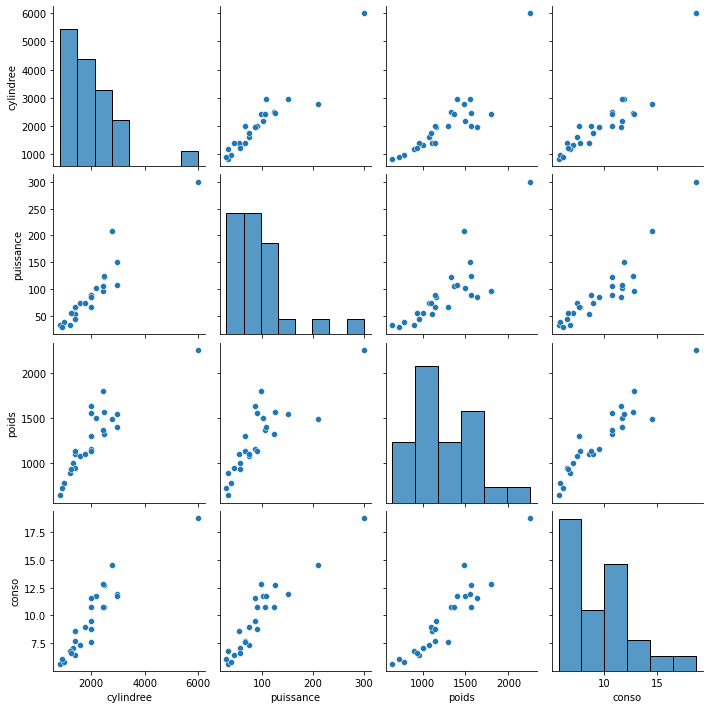

In [157]:
sns.pairplot(data)

D'une manière générale nous observons une dépendance linéaire illustrer les le ploting ci-dessus

Dans cette partie je vais essayer d'élaboirer une régréssion linéaire simple pour expliquer la consommation en fonction de puissance du moteur

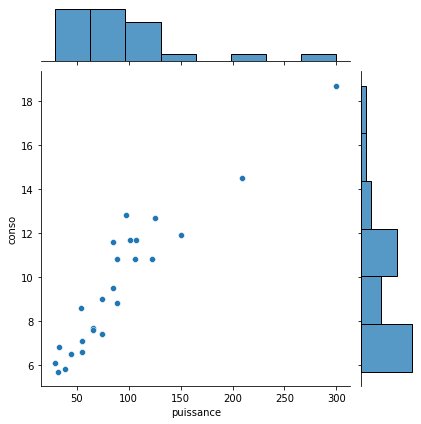

In [158]:
sns.jointplot(x="puissance",y="conso",data=data)

In [159]:
import statsmodels.formula.api as stats

In [160]:
regression=stats.ols("conso~puissance+cylindree+poids",data=data)

In [161]:
resultat=regression.fit()

In [162]:
print(dir(resultat))

['HC0_se', 'HC1_se', 'HC2_se', 'HC3_se', '_HCCM', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_cache', '_data_attr', '_get_robustcov_results', '_is_nested', '_wexog_singular_values', 'aic', 'bic', 'bse', 'centered_tss', 'compare_f_test', 'compare_lm_test', 'compare_lr_test', 'condition_number', 'conf_int', 'conf_int_el', 'cov_HC0', 'cov_HC1', 'cov_HC2', 'cov_HC3', 'cov_kwds', 'cov_params', 'cov_type', 'df_model', 'df_resid', 'eigenvals', 'el_test', 'ess', 'f_pvalue', 'f_test', 'fittedvalues', 'fvalue', 'get_influence', 'get_prediction', 'get_robustcov_results', 'initialize', 'k_constant', 'llf', 'load', 'model', 'mse_model', 'mse_resid', 'mse_total', 'nobs', 'normalized_cov_params', 'outlie

In [163]:
resultat.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  conso   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     154.7
Date:                Thu, 21 Jan 2021   Prob (F-statistic):           1.79e-14
Time:                        19:28:12   Log-Likelihood:                -24.400
No. Observations:                  25   AIC:                             56.80
Df Residuals:                      21   BIC:                             61.68
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2998      0.614      2.117      0.046       0.023       2.577
puissance      0.0303      0.007      4.052      0.001       0.015       0.046
cylindree     -0.0005      0.000     -0.953      0.351      -0.002       0.001
poids          0.0052      0.001      6.447      0.000       0.004       0.007
==============================================================================
Omnibus:                        0.799   Durbin-Watson:                   2.419
Prob(Omnibus):                  0.671   Jarque-Bera (JB):                0.772
Skew:                          -0.369   Prob(JB):                        0.680
Kurtosis:                       2.558   Cond. No.                     1.14e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Nous voyons un problème de multicolinéarité

In [164]:
regression=stats.ols("conso~puissance",data=data)

In [165]:
resultat=regression.fit()

In [166]:
resultat.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  conso   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     137.2
Date:                Thu, 21 Jan 2021   Prob (F-statistic):           3.57e-11
Time:                        19:28:12   Log-Likelihood:                -39.382
No. Observations:                  25   AIC:                             82.76
Df Residuals:                      23   BIC:                             85.20
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.1767      0.453     11.430      0.000       4.240       6.114
puissance      0.0489      0.004     11.715      0.000       0.040       0.058
==============================================================================
Omnibus:                        3.785   Durbin-Watson:                   1.830
Prob(Omnibus):                  0.151   Jarque-Bera (JB):                3.155
Skew:                           0.857   Prob(JB):                        0.207
Kurtosis:                       2.694   Cond. No.                         202.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [167]:
resultat.params

Intercept    5.176714
puissance    0.048899
dtype: float64

In [168]:
pvalue=resultat.pvalues

In [169]:
pvalue

Intercept    5.799283e-11
puissance    3.567074e-11
dtype: float64

In [170]:
prevision=resultat.predict()

In [171]:
data["prevision"]=prevision

In [172]:
data.head()

,modele,cylindree,puissance,poids,conso,prevision
0,Maserati Ghibli GT,2789,209,1485,14.5,15.396517
1,Daihatsu Cuore,846,32,650,5.7,6.741468
2,Toyota Corolla,1331,55,1010,7.1,7.866136
3,Fort Escort 1.4i PT,1390,54,1110,8.6,7.817237
4,Mazda Hachtback V,2497,122,1330,10.8,11.142341


In [173]:
data.prevision

0     15.396517
1      6.741468
2      7.866136
3      7.817237
4     11.142341
5     11.289036
6      9.919876
7     10.115470
8      8.404020
9      9.333093
10     7.083759
11    12.511501
12    19.846288
13    10.359963
14     7.328251
15    10.408862
16     6.790367
17     8.795209
18     8.795209
19     8.404020
20     9.528687
21     9.528687
22     6.594773
23     9.333093
24     7.866136
Name: prevision, dtype: float64

In [178]:
import torch 
from torch.autograd import Variable 
  
x_data = Variable(torch.Tensor(data.puissance)) 
y_data = Variable(torch.Tensor(data.conso)) 
  
  
class LinearRegressionModel(torch.nn.Module): 
  
    def __init__(self): 
        super(LinearRegressionModel, self).__init__() 
        self.linear = torch.nn.Linear(25, 1)  # One in and one out 
  
    def forward(self, x): 
        y_pred = self.linear(x) 
        return y_pred 
  
# our model 
our_model = LinearRegressionModel() 
  
criterion = torch.nn.MSELoss(size_average = False) 
optimizer = torch.optim.SGD(our_model.parameters(), lr = 0.01) 
  
for epoch in range(500): 
  
    # Forward pass: Compute predicted y by passing  
    # x to the model 
    pred_y = our_model(x_data) 
  
    # Compute and print loss 
    loss = criterion(pred_y, y_data) 
  
    # Zero gradients, perform a backward pass,  
    # and update the weights. 
    optimizer.zero_grad() 
    loss.backward() 
    optimizer.step() 
    print('epoch {}, loss {}'.format(epoch, loss.item())) 
  

/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:446: UserWarning: Using a target size (torch.Size([25])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


epoch 0, loss 83718.90625
epoch 1, loss 1807828775862272.0
epoch 2, loss 3.914964485147026e+25
epoch 3, loss 8.478100297195283e+35
epoch 4, loss inf
epoch 5, loss inf
epoch 6, loss inf
epoch 7, loss inf
epoch 8, loss inf
epoch 9, loss nan
epoch 10, loss nan
epoch 11, loss nan
epoch 12, loss nan
epoch 13, loss nan
epoch 14, loss nan
epoch 15, loss nan
epoch 16, loss nan
epoch 17, loss nan
epoch 18, loss nan
epoch 19, loss nan
epoch 20, loss nan
epoch 21, loss nan
epoch 22, loss nan
epoch 23, loss nan
epoch 24, loss nan
epoch 25, loss nan
epoch 26, loss nan
epoch 27, loss nan
epoch 28, loss nan
epoch 29, loss nan
epoch 30, loss nan
epoch 31, loss nan
epoch 32, loss nan
epoch 33, loss nan
epoch 34, loss nan
epoch 35, loss nan
epoch 36, loss nan
epoch 37, loss nan
epoch 38, loss nan
epoch 39, loss nan
epoch 40, loss nan
epoch 41, loss nan
epoch 42, loss nan
epoch 43, loss nan
epoch 44, loss nan
epoch 45, loss nan
epoch 46, loss nan
epoch 47, loss nan
epoch 48, loss nan
epoch 49, loss nan
e

In [ ]:
new_var = Variable(torch.Tensor([[4.0]])) 
pred_y = our_model(new_var) 
print("predict (after training)", 4, our_model(new_var).item()) 